In [3]:
from google.colab import files
uploaded = files.upload()


Saving breast_cancer.csv to breast_cancer.csv


In [4]:
import pandas as pd
df = pd.read_csv('breast_cancer.csv')
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
print(df.isnull().sum())


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df = df.dropna()


In [8]:
# ‘diagnosis’ is M (malignant) or B (benign)
X = df.drop(['id','diagnosis'], axis=1)   # drop id if present
y = df['diagnosis']


In [9]:
y = y.map({'M': 1, 'B': 0})


In [11]:
print(df.shape)     # Should be (569, 32) or similar
print(X.shape)      # Should be (569, n)
print(y.shape)      # Should be (569,)


(0, 33)
(0, 31)
(0,)


In [12]:
import pandas as pd

df = pd.read_csv("breast_cancer.csv")
df = df.drop(['id', 'Unnamed: 32'], axis=1)  # drop non-feature columns if they exist

# Encode the target variable
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Split into features and label
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

print(X.shape, y.shape)  # Should show something like (569, 30) (569,)


(569, 30) (569,)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Linear SVM Accuracy:", accuracy)


Linear SVM Accuracy: 0.956140350877193


In [14]:
# Train RBF SVM
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)

# Predict and Evaluate
y_pred_rbf = svm_rbf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("RBF Kernel SVM Accuracy:", accuracy_rbf)


RBF Kernel SVM Accuracy: 0.9473684210526315


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


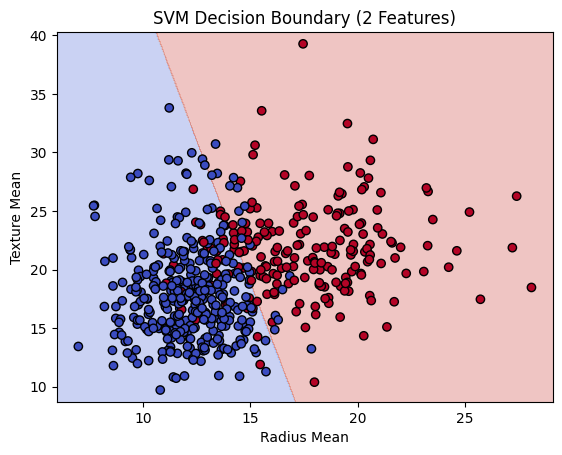

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Select only 2 features for visualization
X_vis = df[['radius_mean', 'texture_mean']]
y_vis = df['diagnosis']

# Train linear SVM on 2D data
svm_2d = SVC(kernel='linear', C=1.0)
svm_2d.fit(X_vis, y_vis)

# Create meshgrid for decision boundary
x_min, x_max = X_vis.iloc[:, 0].min() - 1, X_vis.iloc[:, 0].max() + 1
y_min, y_max = X_vis.iloc[:, 1].min() - 1, X_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_vis, cmap='coolwarm', edgecolors='k')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('SVM Decision Boundary (2 Features)')
plt.show()


In [17]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Create GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validated Accuracy:", grid.best_score_)


Best Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-Validated Accuracy: 0.9098901098901099


In [18]:
from sklearn.model_selection import cross_val_score

# Use the best estimator from Grid Search
best_svm = grid.best_estimator_

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_svm, X, y, cv=5)

# Print results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy: %.4f" % cv_scores.mean())
print("Standard Deviation: %.4f" % cv_scores.std())


Cross-Validation Scores: [0.92982456 0.92105263 0.92105263 0.94736842 0.89380531]
Mean CV Accuracy: 0.9226
Standard Deviation: 0.0173
